# Sentiment Analysis Zero-Shot

This notebook is based on:
```
Michael Achmann. (2023). michaelachmann/social-media-lab: 2023-12-04 (v0.0.6). Zenodo. https://doi.org/10.5281/zenodo.8199901
```
with minimal changes.

## Reading the DataFrame

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Uni/SocialMedSeminar/Daten/csvs/TikTok EN_DE Daten/TikTok_EN_DE_merged.csv')

In [ ]:
df.head()

,id,thread_id,author,author_full,author_followers,author_likes,author_videos,author_avatar,body,timestamp,...,plays,hashtags,challenges,diversification_labels,location_created,stickers,effects,warning,language,Hashtag
0,7172368921318657322,7172368921318657322,creativesociety.official,Creative Society project,226500,1555,1060,NaN,#Climate #ClimateChange #Cycle of #Cataclysm #...,2022-12-02 02:14:38,...,447500,"climate,climatechange,cycle,cataclysm,12000","climate,climatechange,cycle,cataclysm,12000",NaN,NaN,ARE WE FACING \nA WORST-CASE SCENARIO?\nARE WE...,NaN,NaN,Language.ENGLISH,climatechange
1,7256810993311812907,7256810993311812907,wffnews,WFF News,148500,4724,181,NaN,This is wild ✋😳Climate activists broke into a ...,2023-07-17 15:33:12,...,7100000,"news,fyp,headlines,germany,climatechange,activ...","news,fyp,headlines,germany,climatechange,activ...",NaN,NaN,NaN,Green Screen,NaN,Language.ENGLISH,climatechange
2,7224978138751618305,7224978138751618305,thethinkingreatape,TheThinkingreatApe,32400,15,337,NaN,Neil deGrasse Tyson Climate change. #climatech...,2023-04-22 20:49:25,...,377800,"climatechange,neildegrassetyson,science,atheist","climatechange,neildegrassetyson,science,atheist",NaN,NaN,NaN,NaN,NaN,Language.ENGLISH,climatechange
3,7291671021827116334,7291671021827116334,just_breathe_sunshine,Just_breathe,52,37,22,NaN,"🔴Watch the conference ""GLOBAL CRISIS. America ...",2023-10-19 14:08:01,...,14600,"prepare,cataclism,naturaldisastersurvival,natu...","prepare,cataclism,naturaldisastersurvival,natu...",NaN,NaN,NaN,NaN,NaN,Language.ENGLISH,climatechange
4,7252904683222895918,7252904683222895918,cbsnews,cbsnews,3600000,633,1669,NaN,Fans erupted in anger when protesters from #Ju...,2023-07-07 02:54:41,...,13300000,"juststopoil,wimbledon,news,climatechange","juststopoil,wimbledon,news,climatechange",NaN,NaN,NaN,NaN,NaN,Language.ENGLISH,climatechange


In [ ]:
# adding a unique identifier
df['identifier'] = df.apply(lambda x: f"{x['id']}-{x['Hashtag']}", axis=1)

In [ ]:
df.head()

,id,thread_id,author,author_full,author_followers,author_likes,author_videos,author_avatar,body,timestamp,...,hashtags,challenges,diversification_labels,location_created,stickers,effects,warning,language,Hashtag,identifier
0,7172368921318657322,7172368921318657322,creativesociety.official,Creative Society project,226500,1555,1060,NaN,#Climate #ClimateChange #Cycle of #Cataclysm #...,2022-12-02 02:14:38,...,"climate,climatechange,cycle,cataclysm,12000","climate,climatechange,cycle,cataclysm,12000",NaN,NaN,ARE WE FACING \nA WORST-CASE SCENARIO?\nARE WE...,NaN,NaN,Language.ENGLISH,climatechange,7172368921318657322-climatechange
1,7256810993311812907,7256810993311812907,wffnews,WFF News,148500,4724,181,NaN,This is wild ✋😳Climate activists broke into a ...,2023-07-17 15:33:12,...,"news,fyp,headlines,germany,climatechange,activ...","news,fyp,headlines,germany,climatechange,activ...",NaN,NaN,NaN,Green Screen,NaN,Language.ENGLISH,climatechange,7256810993311812907-climatechange
2,7224978138751618305,7224978138751618305,thethinkingreatape,TheThinkingreatApe,32400,15,337,NaN,Neil deGrasse Tyson Climate change. #climatech...,2023-04-22 20:49:25,...,"climatechange,neildegrassetyson,science,atheist","climatechange,neildegrassetyson,science,atheist",NaN,NaN,NaN,NaN,NaN,Language.ENGLISH,climatechange,7224978138751618305-climatechange
3,7291671021827116334,7291671021827116334,just_breathe_sunshine,Just_breathe,52,37,22,NaN,"🔴Watch the conference ""GLOBAL CRISIS. America ...",2023-10-19 14:08:01,...,"prepare,cataclism,naturaldisastersurvival,natu...","prepare,cataclism,naturaldisastersurvival,natu...",NaN,NaN,NaN,NaN,NaN,Language.ENGLISH,climatechange,7291671021827116334-climatechange
4,7252904683222895918,7252904683222895918,cbsnews,cbsnews,3600000,633,1669,NaN,Fans erupted in anger when protesters from #Ju...,2023-07-07 02:54:41,...,"juststopoil,wimbledon,news,climatechange","juststopoil,wimbledon,news,climatechange",NaN,NaN,NaN,NaN,NaN,Language.ENGLISH,climatechange,7252904683222895918-climatechange


In [ ]:
df.to_csv('/content/drive/MyDrive/Uni/SocialMedSeminar/Daten/csvs/TikTok EN_DE Daten/TikTokENDE-identifier-Posts-Text-Master.csv')

### Setup for GPT

In [ ]:
!pip install -q openai backoff gpt-cost-estimator

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.4/227.4 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.2 MB/s eta 0:00:00


In [ ]:
import openai
from openai import OpenAI
from google.colab import userdata
import backoff
from gpt_cost_estimator import CostEstimator


#@title Setup for the OpenAI API


#@markdown We're using the new Colab Feature to store keys safely within the Colab Environment.
#@markdown Click on the key on the left to add your API key and enable it for this notebook.
#@markdown Enter the name of your API-Key below.
api_key_name = "" # @param {type: "string"}
api_key = userdata.get(api_key_name)

# Initialize OpenAI using the key
client = OpenAI(
    api_key=api_key,
    #organization='  '
)



@CostEstimator()
def query_openai(model, temperature, messages, mock=True, completion_tokens=10):
    return client.chat.completions.create(
                      model=model,
                      temperature=temperature,
                      messages=messages,
                      max_tokens=600)

# We define the run_request method to wrap it with the @backoff decorator
@backoff.on_exception(backoff.expo, (openai.RateLimitError, openai.APIError))
def run_request(system_prompt, user_prompt, model, mock):
  messages = [
    {"role": "system", "content": system_prompt},
    {"role": "user", "content": user_prompt}
  ]

  return query_openai(
          model=model,
          temperature=0.0,
          messages=messages,
          mock=mock
        )

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
system_prompt = """
You are an advanced classifying AI. Your task is to classify the sentiment of a text. Sentiment can be either ‘positive’, ‘negative’, or ‘neutral’.
"""

In [ ]:
prompt = """
Please classify the following social media comment into either ‘negative’, ‘neutral’, or ‘positive’. Your answer MUST be one of [‘negative’, ‘neutral’, ‘positive’], and it should be presented in lowercase.
Text: [TEXT]
"""

In [ ]:
from tqdm.auto import tqdm
#@title Running the request.
#@markdown The following code snippet uses my [gpt-cost-estimator](https://pypi.org/project/gpt-cost-estimator/) package to simulate API requests and calculate a cost estimate. Please run the estimation whne possible to asses the price-tag before sending requests to OpenAI!

#@markdown Make sure 'run_request' and 'system_prompt' are defined before this block by running the two blocks above!

#@markdown Do you want to mock the OpenAI request (dry run) to calculate the estimated price?
MOCK = False # @param {type: "boolean"}
#@markdown Do you want to reset the cost estimation when running the query?
RESET_COST = True # @param {type: "boolean"}
#@markdown What's the column name to save the results of the data extraction task to?
COLUMN = 'Sentiment' # @param {type: "string"}
#@markdown Do you want to run the request on a smaller sample of the whole data? (Useful for testing). Enter 0 to run on the whole dataset.
SAMPLE_SIZE = 0 # @param {type: "number", min: 0}

#@markdown Which model do you want to use?
MODEL = "gpt-3.5-turbo-0613" # @param ["gpt-3.5-turbo-0613", "gpt-4-1106-preview", "gpt-4-0613"] {allow-input: true}


# Initializing the empty column
if COLUMN not in df.columns:
  df[COLUMN] = None

# Reset Estimates
CostEstimator.reset()
print("Reset Cost Estimation")

filtered_df = df.copy()

# Skip previously annotated rows
filtered_df = filtered_df[pd.isna(filtered_df[COLUMN])]

if SAMPLE_SIZE > 0:
  filtered_df = filtered_df.sample(SAMPLE_SIZE)

for index, row in tqdm(filtered_df.iterrows(), total=len(filtered_df)):
    try:
        p = prompt.replace('[TEXT]', row['body'])
        response = run_request(system_prompt, p, MODEL, MOCK)

        if not MOCK:
          # Extract the response content
          # Adjust the following line according to the structure of the response
          r = response.choices[0].message.content

          # Update the 'new_df' DataFrame
          df.at[index, COLUMN] = r

    except Exception as e:
        print(f"An error occurred: {e}")
        # Optionally, handle the error (e.g., by logging or by setting a default value)

print()

Reset Cost Estimation


  0%|          | 0/3103 [00:00<?, ?it/s]

Cost: $0.0005 | Total: $0.7693


In [ ]:
df[~pd.isna(df['Sentiment'])].head()

,id,thread_id,author,author_full,author_followers,author_likes,author_videos,author_avatar,body,timestamp,...,challenges,diversification_labels,location_created,stickers,effects,warning,language,Hashtag,identifier,Sentiment
0,7172368921318657322,7172368921318657322,creativesociety.official,Creative Society project,226500,1555,1060,NaN,#Climate #ClimateChange #Cycle of #Cataclysm #...,2022-12-02 02:14:38,...,"climate,climatechange,cycle,cataclysm,12000",NaN,NaN,ARE WE FACING \nA WORST-CASE SCENARIO?\nARE WE...,NaN,NaN,Language.ENGLISH,climatechange,7172368921318657322-climatechange,neutral
1,7256810993311812907,7256810993311812907,wffnews,WFF News,148500,4724,181,NaN,This is wild ✋😳Climate activists broke into a ...,2023-07-17 15:33:12,...,"news,fyp,headlines,germany,climatechange,activ...",NaN,NaN,NaN,Green Screen,NaN,Language.ENGLISH,climatechange,7256810993311812907-climatechange,negative
2,7224978138751618305,7224978138751618305,thethinkingreatape,TheThinkingreatApe,32400,15,337,NaN,Neil deGrasse Tyson Climate change. #climatech...,2023-04-22 20:49:25,...,"climatechange,neildegrassetyson,science,atheist",NaN,NaN,NaN,NaN,NaN,Language.ENGLISH,climatechange,7224978138751618305-climatechange,neutral
3,7291671021827116334,7291671021827116334,just_breathe_sunshine,Just_breathe,52,37,22,NaN,"🔴Watch the conference ""GLOBAL CRISIS. America ...",2023-10-19 14:08:01,...,"prepare,cataclism,naturaldisastersurvival,natu...",NaN,NaN,NaN,NaN,NaN,Language.ENGLISH,climatechange,7291671021827116334-climatechange,neutral
4,7252904683222895918,7252904683222895918,cbsnews,cbsnews,3600000,633,1669,NaN,Fans erupted in anger when protesters from #Ju...,2023-07-07 02:54:41,...,"juststopoil,wimbledon,news,climatechange",NaN,NaN,NaN,NaN,NaN,Language.ENGLISH,climatechange,7252904683222895918-climatechange,negative


In [ ]:
# Save Results
df.to_csv('/content/drive/MyDrive/Uni/SocialMedSeminar/Daten/SentiTikTokAll_EN_DE_GPT3.5Turbo.csv')

In [ ]:
df_tiktok = pd.read_csv('/content/drive/MyDrive/Uni/SocialMedSeminar/Daten/tiktok_final/TikTok_DATA_COMPLETE/TikTokAll_EN_DE_merged.csv')

In [ ]:
df_insta = pd.read_csv('/content/drive/MyDrive/Uni/SocialMedSeminar/Daten/insta_final/INSTA_DATA_COMPLETE/InstaAll_EN_DE_merged.csv')

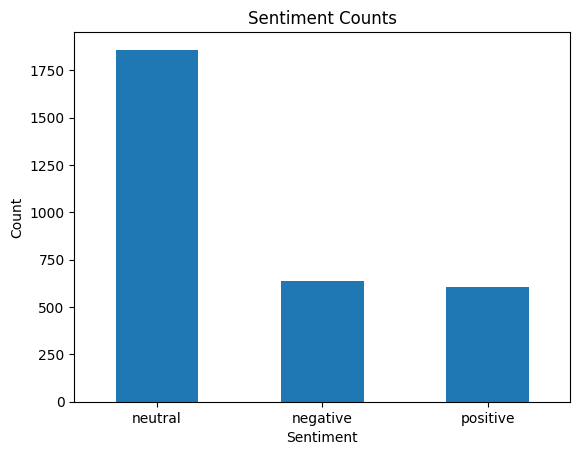

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each sentiment
sentiment_counts = df_tiktok['Sentiment'].value_counts()

# Create a bar chart
sentiment_counts.plot(kind='bar')

# Adding labels and title
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Counts')
plt.xticks(rotation=360)

plt.savefig('tiktok_senti.jpg')
# Show the plot
plt.show()

In [ ]:
plt.savefig('tiktok_senti.png')

<Figure size 640x480 with 0 Axes>

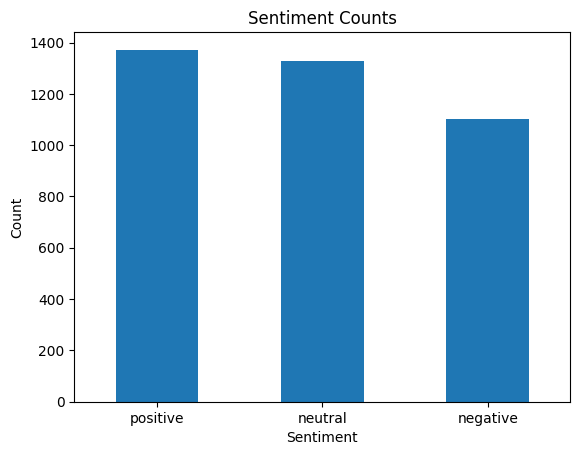

In [ ]:
# Count the occurrences of each sentiment
sentiment_counts = df_insta['Sentiment'].value_counts()

# Create a bar chart
sentiment_counts.plot(kind='bar')

# Adding labels and title
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Counts')
plt.xticks(rotation=360)

plt.savefig('insta_senti.jpg')
# Show the plot
plt.show()

In [ ]:
plt.savefig('insta_senti.jpg')

<Figure size 640x480 with 0 Axes>